In [1]:
# 1. Import libraries / استيراد المكتبات
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt  # import matplotlib for data visualization
plt.style.use('seaborn-v0_8') # use modern color style

1. Choose a dataset from Kaggle

In [2]:
#Two datasets were used:
 #Mental Health & Technology Usage 2024
#Screen Time & App Usage Data
#The first covers stress, sleep, and tech habits.
#The second tracks daily app use by category.
#Merging them gave a full view of why people spend so much time on their screens.

In [3]:
screen = pd.read_csv("screen_time_app_usage_dataset.csv")
mental = pd.read_csv("mental_health_and_technology_usage_2024.csv")

screen["Screen_Time_Hours"] = (screen["screen_time_min"] / 60).round(1)

merged = pd.merge(screen, mental, on="Screen_Time_Hours", how="inner")
merged.to_csv("new_merged_dataset.csv", index=False)


2. Load the dataset into a pandas DataFrame.

In [4]:
#2. Load the dataset into a pandas DataFrame. 
df = pd.read_csv("new_merged_dataset.csv")
df

,user_id,date,app_name,category,screen_time_min,launches,interactions,is_productive,youtube_views,youtube_likes,...,Technology_Usage_Hours,Social_Media_Usage_Hours,Gaming_Hours,Mental_Health_Status,Stress_Level,Sleep_Hours,Physical_Activity_Hours,Support_Systems_Access,Work_Environment_Impact,Online_Support_Usage
0,1064,2024-01-01 03:38:28.369456485,Chrome,Utilities,85.15,2,5,False,NaN,NaN,...,7.58,7.92,1.62,Fair,Low,5.20,7.24,No,Neutral,No
1,1064,2024-01-01 03:38:28.369456485,Chrome,Utilities,85.15,2,5,False,NaN,NaN,...,8.28,2.09,4.14,Fair,High,5.61,5.08,No,Neutral,Yes
2,1064,2024-01-01 03:38:28.369456485,Chrome,Utilities,85.15,2,5,False,NaN,NaN,...,1.20,1.67,1.57,Excellent,High,7.29,9.64,Yes,Positive,No
3,1064,2024-01-01 03:38:28.369456485,Chrome,Utilities,85.15,2,5,False,NaN,NaN,...,6.95,1.00,3.28,Fair,Low,6.85,4.66,Yes,Neutral,No
4,1064,2024-01-01 03:38:28.369456485,Chrome,Utilities,85.15,2,5,False,NaN,NaN,...,10.57,7.28,3.45,Fair,Low,5.65,9.81,No,Neutral,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2540,1038,2024-03-31 23:16:18.326108703,WhatsApp,Social,149.72,3,5,False,NaN,NaN,...,3.97,3.19,4.85,Fair,Low,8.98,5.34,Yes,Positive,Yes
2541,1038,2024-03-31 23:16:18.326108703,WhatsApp,Social,149.72,3,5,False,NaN,NaN,...,10.05,4.69,3.58,Fair,Low,6.76,0.37,No,Neutral,No
2542,1038,2024-03-31 23:16:18.326108703,WhatsApp,Social,149.72,3,5,False,NaN,NaN,...,1.81,5.54,3.52,Fair,Medium,6.59,3.66,No,Negative,No
2543,1038,2024-03-31 23:16:18.326108703,WhatsApp,Social,149.72,3,5,False,NaN,NaN,...,1.95,5.59,3.46,Good,Medium,6.03,6.14,No,Neutral,No


3. Perform data cleaning and preprocessing: 

In [5]:
# Shows all column names in the DataFrame
df.columns

Index(['user_id', 'date', 'app_name', 'category', 'screen_time_min',
       'launches', 'interactions', 'is_productive', 'youtube_views',
       'youtube_likes', 'youtube_comments', 'extra_col_11', 'extra_col_12',
       'extra_col_13', 'extra_col_14', 'extra_col_15', 'extra_col_16',
       'extra_col_17', 'extra_col_18', 'extra_col_19', 'extra_col_20',
       'extra_col_21', 'extra_col_22', 'extra_col_23', 'Screen_Time_Hours',
       'User_ID', 'Age', 'Gender', 'Technology_Usage_Hours',
       'Social_Media_Usage_Hours', 'Gaming_Hours', 'Mental_Health_Status',
       'Stress_Level', 'Sleep_Hours', 'Physical_Activity_Hours',
       'Support_Systems_Access', 'Work_Environment_Impact',
       'Online_Support_Usage'],
      dtype='object')

In [6]:
# quick count of missing values per column
df.isnull().sum() 

user_id                        0
date                           0
app_name                       0
category                       0
screen_time_min                0
launches                       0
interactions                   0
is_productive                  0
youtube_views               2386
youtube_likes               2386
youtube_comments            2386
extra_col_11                   0
extra_col_12                   0
extra_col_13                   0
extra_col_14                   0
extra_col_15                   0
extra_col_16                   0
extra_col_17                   0
extra_col_18                   0
extra_col_19                   0
extra_col_20                   0
extra_col_21                   0
extra_col_22                   0
extra_col_23                   0
Screen_Time_Hours              0
User_ID                        0
Age                            0
Gender                         0
Technology_Usage_Hours         0
Social_Media_Usage_Hours       0
Gaming_Hou

In [7]:
# Removes all columns that are completely empty (contain only NaN values)
df.dropna(axis=1, how='all', inplace=True)
df

,user_id,date,app_name,category,screen_time_min,launches,interactions,is_productive,youtube_views,youtube_likes,...,Technology_Usage_Hours,Social_Media_Usage_Hours,Gaming_Hours,Mental_Health_Status,Stress_Level,Sleep_Hours,Physical_Activity_Hours,Support_Systems_Access,Work_Environment_Impact,Online_Support_Usage
0,1064,2024-01-01 03:38:28.369456485,Chrome,Utilities,85.15,2,5,False,NaN,NaN,...,7.58,7.92,1.62,Fair,Low,5.20,7.24,No,Neutral,No
1,1064,2024-01-01 03:38:28.369456485,Chrome,Utilities,85.15,2,5,False,NaN,NaN,...,8.28,2.09,4.14,Fair,High,5.61,5.08,No,Neutral,Yes
2,1064,2024-01-01 03:38:28.369456485,Chrome,Utilities,85.15,2,5,False,NaN,NaN,...,1.20,1.67,1.57,Excellent,High,7.29,9.64,Yes,Positive,No
3,1064,2024-01-01 03:38:28.369456485,Chrome,Utilities,85.15,2,5,False,NaN,NaN,...,6.95,1.00,3.28,Fair,Low,6.85,4.66,Yes,Neutral,No
4,1064,2024-01-01 03:38:28.369456485,Chrome,Utilities,85.15,2,5,False,NaN,NaN,...,10.57,7.28,3.45,Fair,Low,5.65,9.81,No,Neutral,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2540,1038,2024-03-31 23:16:18.326108703,WhatsApp,Social,149.72,3,5,False,NaN,NaN,...,3.97,3.19,4.85,Fair,Low,8.98,5.34,Yes,Positive,Yes
2541,1038,2024-03-31 23:16:18.326108703,WhatsApp,Social,149.72,3,5,False,NaN,NaN,...,10.05,4.69,3.58,Fair,Low,6.76,0.37,No,Neutral,No
2542,1038,2024-03-31 23:16:18.326108703,WhatsApp,Social,149.72,3,5,False,NaN,NaN,...,1.81,5.54,3.52,Fair,Medium,6.59,3.66,No,Negative,No
2543,1038,2024-03-31 23:16:18.326108703,WhatsApp,Social,149.72,3,5,False,NaN,NaN,...,1.95,5.59,3.46,Good,Medium,6.03,6.14,No,Neutral,No


In [8]:
# Removes extra spaces from column names and text values  
# يحذف المسافات الزائدة من أسماء الأعمدة والقيم النصية
# Strip spaces
df.columns = df.columns.str.strip()
for c in df.select_dtypes(include='object').columns:
    df[c] = df[c].str.strip()

In [9]:
# Drop duplicates
df.drop_duplicates(inplace=True)

In [10]:
# quick count of missing values per column
df.isnull().sum()

user_id                        0
date                           0
app_name                       0
category                       0
screen_time_min                0
launches                       0
interactions                   0
is_productive                  0
youtube_views               2386
youtube_likes               2386
youtube_comments            2386
extra_col_11                   0
extra_col_12                   0
extra_col_13                   0
extra_col_14                   0
extra_col_15                   0
extra_col_16                   0
extra_col_17                   0
extra_col_18                   0
extra_col_19                   0
extra_col_20                   0
extra_col_21                   0
extra_col_22                   0
extra_col_23                   0
Screen_Time_Hours              0
User_ID                        0
Age                            0
Gender                         0
Technology_Usage_Hours         0
Social_Media_Usage_Hours       0
Gaming_Hou

In [11]:
# # Fill missing values using mean for numeric and mode for text columns
for c in df.columns:
    if df[c].dtype == 'object':
        df[c] = df[c].fillna(df[c].mode()[0])
    else:
        df[c] = df[c].fillna(df[c].mean())

In [12]:
df.isnull().sum()  # if there is any missing values per column?

user_id                     0
date                        0
app_name                    0
category                    0
screen_time_min             0
launches                    0
interactions                0
is_productive               0
youtube_views               0
youtube_likes               0
youtube_comments            0
extra_col_11                0
extra_col_12                0
extra_col_13                0
extra_col_14                0
extra_col_15                0
extra_col_16                0
extra_col_17                0
extra_col_18                0
extra_col_19                0
extra_col_20                0
extra_col_21                0
extra_col_22                0
extra_col_23                0
Screen_Time_Hours           0
User_ID                     0
Age                         0
Gender                      0
Technology_Usage_Hours      0
Social_Media_Usage_Hours    0
Gaming_Hours                0
Mental_Health_Status        0
Stress_Level                0
Sleep_Hour

In [13]:
# Convert all column names to lowercase for consistent formatting
df.columns = df.columns.str.lower()
df

,user_id,date,app_name,category,screen_time_min,launches,interactions,is_productive,youtube_views,youtube_likes,...,technology_usage_hours,social_media_usage_hours,gaming_hours,mental_health_status,stress_level,sleep_hours,physical_activity_hours,support_systems_access,work_environment_impact,online_support_usage
0,1064,2024-01-01 03:38:28.369456485,Chrome,Utilities,85.15,2,5,False,232223.415094,12724.830189,...,7.58,7.92,1.62,Fair,Low,5.20,7.24,No,Neutral,No
1,1064,2024-01-01 03:38:28.369456485,Chrome,Utilities,85.15,2,5,False,232223.415094,12724.830189,...,8.28,2.09,4.14,Fair,High,5.61,5.08,No,Neutral,Yes
2,1064,2024-01-01 03:38:28.369456485,Chrome,Utilities,85.15,2,5,False,232223.415094,12724.830189,...,1.20,1.67,1.57,Excellent,High,7.29,9.64,Yes,Positive,No
3,1064,2024-01-01 03:38:28.369456485,Chrome,Utilities,85.15,2,5,False,232223.415094,12724.830189,...,6.95,1.00,3.28,Fair,Low,6.85,4.66,Yes,Neutral,No
4,1064,2024-01-01 03:38:28.369456485,Chrome,Utilities,85.15,2,5,False,232223.415094,12724.830189,...,10.57,7.28,3.45,Fair,Low,5.65,9.81,No,Neutral,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2540,1038,2024-03-31 23:16:18.326108703,WhatsApp,Social,149.72,3,5,False,232223.415094,12724.830189,...,3.97,3.19,4.85,Fair,Low,8.98,5.34,Yes,Positive,Yes
2541,1038,2024-03-31 23:16:18.326108703,WhatsApp,Social,149.72,3,5,False,232223.415094,12724.830189,...,10.05,4.69,3.58,Fair,Low,6.76,0.37,No,Neutral,No
2542,1038,2024-03-31 23:16:18.326108703,WhatsApp,Social,149.72,3,5,False,232223.415094,12724.830189,...,1.81,5.54,3.52,Fair,Medium,6.59,3.66,No,Negative,No
2543,1038,2024-03-31 23:16:18.326108703,WhatsApp,Social,149.72,3,5,False,232223.415094,12724.830189,...,1.95,5.59,3.46,Good,Medium,6.03,6.14,No,Neutral,No


In [14]:
# Check data types of all columns to ensure correct formats before analysis
df.dtypes

user_id                       int64
date                         object
app_name                     object
category                     object
screen_time_min             float64
launches                      int64
interactions                  int64
is_productive                  bool
youtube_views               float64
youtube_likes               float64
youtube_comments            float64
extra_col_11                float64
extra_col_12                float64
extra_col_13                float64
extra_col_14                float64
extra_col_15                float64
extra_col_16                float64
extra_col_17                float64
extra_col_18                float64
extra_col_19                float64
extra_col_20                float64
extra_col_21                float64
extra_col_22                float64
extra_col_23                float64
screen_time_hours           float64
user_id                      object
age                           int64
gender                      

In [15]:
# Convert 'age' to numeric type to ensure accurate analysis
if 'age' in df.columns:
    df['age'] = pd.to_numeric(df['age'], errors='coerce').astype('Int64')

# Save the updated DataFrame back to CSV file
df.to_csv("new_merged_dataset.csv", index=False)

In [16]:
# Display dataset summary after cleaning to verify data types and non-null counts
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2545 entries, 0 to 2544
Data columns (total 38 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   user_id                   2545 non-null   int64  
 1   date                      2545 non-null   object 
 2   app_name                  2545 non-null   object 
 3   category                  2545 non-null   object 
 4   screen_time_min           2545 non-null   float64
 5   launches                  2545 non-null   int64  
 6   interactions              2545 non-null   int64  
 7   is_productive             2545 non-null   bool   
 8   youtube_views             2545 non-null   float64
 9   youtube_likes             2545 non-null   float64
 10  youtube_comments          2545 non-null   float64
 11  extra_col_11              2545 non-null   float64
 12  extra_col_12              2545 non-null   float64
 13  extra_col_13              2545 non-null   float64
 14  extra_co

In [17]:
#Check for missing values
df.isnull().sum()

user_id                     0
date                        0
app_name                    0
category                    0
screen_time_min             0
launches                    0
interactions                0
is_productive               0
youtube_views               0
youtube_likes               0
youtube_comments            0
extra_col_11                0
extra_col_12                0
extra_col_13                0
extra_col_14                0
extra_col_15                0
extra_col_16                0
extra_col_17                0
extra_col_18                0
extra_col_19                0
extra_col_20                0
extra_col_21                0
extra_col_22                0
extra_col_23                0
screen_time_hours           0
user_id                     0
age                         0
gender                      0
technology_usage_hours      0
social_media_usage_hours    0
gaming_hours                0
mental_health_status        0
stress_level                0
sleep_hour

In [18]:
# Drop unnecessary or extra columns from the dataset
df.drop(columns=[
    'extra_col_11','extra_col_12','extra_col_13','extra_col_14',
    'extra_col_15','extra_col_16','extra_col_17','extra_col_18',
    'extra_col_19','extra_col_20','extra_col_21','extra_col_22',
    'extra_col_23','user_id','youtube_views','youtube_likes','youtube_comments',
    'work_environment_impact','launches','interactions','date'
], inplace=True, errors='ignore')

# Save the cleaned dataset back to CSV file
df.to_csv("new_merged_dataset.csv", index=False)
print("Unnecessary columns removed and file saved successfully!")

Unnecessary columns removed and file saved successfully!


In [19]:
df.columns

Index(['app_name', 'category', 'screen_time_min', 'is_productive',
       'screen_time_hours', 'age', 'gender', 'technology_usage_hours',
       'social_media_usage_hours', 'gaming_hours', 'mental_health_status',
       'stress_level', 'sleep_hours', 'physical_activity_hours',
       'support_systems_access', 'online_support_usage'],
      dtype='object')

In [20]:
df.shape

(2545, 16)

In [21]:
df

,app_name,category,screen_time_min,is_productive,screen_time_hours,age,gender,technology_usage_hours,social_media_usage_hours,gaming_hours,mental_health_status,stress_level,sleep_hours,physical_activity_hours,support_systems_access,online_support_usage
0,Chrome,Utilities,85.15,False,1.4,65,Other,7.58,7.92,1.62,Fair,Low,5.20,7.24,No,No
1,Chrome,Utilities,85.15,False,1.4,32,Other,8.28,2.09,4.14,Fair,High,5.61,5.08,No,Yes
2,Chrome,Utilities,85.15,False,1.4,62,Other,1.20,1.67,1.57,Excellent,High,7.29,9.64,Yes,No
3,Chrome,Utilities,85.15,False,1.4,31,Female,6.95,1.00,3.28,Fair,Low,6.85,4.66,Yes,No
4,Chrome,Utilities,85.15,False,1.4,53,Male,10.57,7.28,3.45,Fair,Low,5.65,9.81,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2540,WhatsApp,Social,149.72,False,2.5,37,Other,3.97,3.19,4.85,Fair,Low,8.98,5.34,Yes,Yes
2541,WhatsApp,Social,149.72,False,2.5,62,Male,10.05,4.69,3.58,Fair,Low,6.76,0.37,No,No
2542,WhatsApp,Social,149.72,False,2.5,45,Other,1.81,5.54,3.52,Fair,Medium,6.59,3.66,No,No
2543,WhatsApp,Social,149.72,False,2.5,44,Male,1.95,5.59,3.46,Good,Medium,6.03,6.14,No,No


In [22]:
# Select a random sample of 1000 rows to simplify analysis and reduce dataset size
df = df.sample(n=1000, random_state=42)

# Save back to the same file (overwrite the original)
df.to_csv("new_merged_dataset.csv", index=False)
print("Dataset reduced to 1000 rows and saved successfully!")

Dataset reduced to 1000 rows and saved successfully!


In [23]:
# Display dataset shape after cleaning to confirm final number of rows and columns
print("Shape after cleaning:", df.shape)

Shape after cleaning: (1000, 16)


4. Perform data analysis using pandas:

In [24]:
# Reset index after sampling to make it sequential from 1
df.reset_index(drop=True, inplace=True)
df.index += 1  # start numbering from 1 instead of 0

In [25]:
# Show the first 5 rows of the dataset to preview data after cleaning
df.head()  

,app_name,category,screen_time_min,is_productive,screen_time_hours,age,gender,technology_usage_hours,social_media_usage_hours,gaming_hours,mental_health_status,stress_level,sleep_hours,physical_activity_hours,support_systems_access,online_support_usage
1,Slack,Productivity,61.13,True,1.0,22,Male,8.31,0.93,1.51,Fair,Low,4.66,4.93,No,No
2,Instagram,Social,74.35,False,1.2,59,Male,11.09,6.96,4.17,Poor,Medium,7.10,1.29,Yes,No
3,Notion,Productivity,112.84,True,1.9,27,Other,4.77,7.20,3.25,Fair,Medium,6.57,5.77,No,No
4,WhatsApp,Social,61.69,False,1.0,47,Male,2.41,4.09,4.39,Poor,Medium,6.21,0.33,Yes,No
5,Google Docs,Productivity,106.11,True,1.8,57,Other,3.84,1.28,1.78,Good,High,5.39,4.45,Yes,No


In [26]:
# Show the first 10 rows of the dataset to review a larger data sample
df.head(10)

,app_name,category,screen_time_min,is_productive,screen_time_hours,age,gender,technology_usage_hours,social_media_usage_hours,gaming_hours,mental_health_status,stress_level,sleep_hours,physical_activity_hours,support_systems_access,online_support_usage
1,Slack,Productivity,61.13,True,1.0,22,Male,8.31,0.93,1.51,Fair,Low,4.66,4.93,No,No
2,Instagram,Social,74.35,False,1.2,59,Male,11.09,6.96,4.17,Poor,Medium,7.10,1.29,Yes,No
3,Notion,Productivity,112.84,True,1.9,27,Other,4.77,7.20,3.25,Fair,Medium,6.57,5.77,No,No
4,WhatsApp,Social,61.69,False,1.0,47,Male,2.41,4.09,4.39,Poor,Medium,6.21,0.33,Yes,No
5,Google Docs,Productivity,106.11,True,1.8,57,Other,3.84,1.28,1.78,Good,High,5.39,4.45,Yes,No
6,Google Docs,Productivity,90.26,True,1.5,48,Female,2.88,5.71,2.52,Fair,Medium,8.36,2.74,No,No
7,Snapchat,Social,108.19,False,1.8,41,Male,1.68,6.02,0.39,Fair,High,5.08,6.39,Yes,No
8,Gmail,Utilities,60.27,False,1.0,49,Other,1.74,6.10,4.81,Good,Medium,4.06,2.55,No,Yes
9,YouTube,Entertainment,71.70,False,1.2,38,Female,3.06,0.82,2.76,Excellent,Low,4.41,8.60,No,Yes
10,Twitter,Social,86.34,False,1.4,65,Other,7.58,7.92,1.62,Fair,Low,5.20,7.24,No,No


In [27]:
# Show the last 5 rows of the dataset to review the end of the table
df.tail()  

,app_name,category,screen_time_min,is_productive,screen_time_hours,age,gender,technology_usage_hours,social_media_usage_hours,gaming_hours,mental_health_status,stress_level,sleep_hours,physical_activity_hours,support_systems_access,online_support_usage
996,Twitter,Social,74.26,False,1.2,59,Female,9.07,4.05,1.86,Excellent,Low,6.16,8.90,No,Yes
997,Microsoft Teams,Productivity,66.59,True,1.1,39,Female,8.21,3.61,2.14,Good,Medium,7.90,6.11,No,Yes
998,Twitch,Entertainment,73.40,False,1.2,31,Male,9.46,7.86,3.69,Poor,High,5.85,2.87,No,No
999,Netflix,Entertainment,58.67,False,1.0,49,Other,1.74,6.10,4.81,Good,Medium,4.06,2.55,No,Yes
1000,Chrome,Utilities,185.65,False,3.1,54,Male,3.07,6.47,0.82,Excellent,Medium,6.27,7.84,No,Yes


In [28]:
# Show the total number of rows and columns in the dataset
df.shape

(1000, 16)

In [29]:
# List all column names in the dataset
df.columns 

Index(['app_name', 'category', 'screen_time_min', 'is_productive',
       'screen_time_hours', 'age', 'gender', 'technology_usage_hours',
       'social_media_usage_hours', 'gaming_hours', 'mental_health_status',
       'stress_level', 'sleep_hours', 'physical_activity_hours',
       'support_systems_access', 'online_support_usage'],
      dtype='object')

In [30]:
# Display detailed info about columns, data types, non-null counts, and memory usage
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 1 to 1000
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   app_name                  1000 non-null   object 
 1   category                  1000 non-null   object 
 2   screen_time_min           1000 non-null   float64
 3   is_productive             1000 non-null   bool   
 4   screen_time_hours         1000 non-null   float64
 5   age                       1000 non-null   Int64  
 6   gender                    1000 non-null   object 
 7   technology_usage_hours    1000 non-null   float64
 8   social_media_usage_hours  1000 non-null   float64
 9   gaming_hours              1000 non-null   float64
 10  mental_health_status      1000 non-null   object 
 11  stress_level              1000 non-null   object 
 12  sleep_hours               1000 non-null   float64
 13  physical_activity_hours   1000 non-null   float64
 14  support_

In [31]:
# show basic statistics for numeric columns (mean, std, min, max, etc.)
df.describe()

,screen_time_min,screen_time_hours,age,technology_usage_hours,social_media_usage_hours,gaming_hours,sleep_hours,physical_activity_hours
count,1000.000000,1000.00000,1000.0,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000
mean,93.594860,1.56200,40.148,5.557620,4.04206,2.714090,6.206590,4.805520
std,32.857842,0.54576,13.188936,3.304239,2.17088,1.382618,1.398072,2.712112
min,57.060000,1.00000,18.0,1.110000,0.21000,0.100000,4.040000,0.100000
25%,71.260000,1.20000,29.0,2.410000,2.21000,1.610000,5.070000,2.550000
50%,82.340000,1.40000,39.0,4.960000,4.05000,2.760000,6.210000,4.905000
75%,108.230000,1.80000,50.0,8.310000,5.71000,3.912500,7.150000,6.980000
max,218.390000,3.60000,65.0,11.960000,7.92000,4.990000,8.980000,9.860000


In [32]:
# Returns the number of unique (distinct) values in each column of the DataFrame
df.nunique()

app_name                     20
category                      4
screen_time_min             386
is_productive                 2
screen_time_hours            26
age                          47
gender                        3
technology_usage_hours      141
social_media_usage_hours    140
gaming_hours                125
mental_health_status          4
stress_level                  3
sleep_hours                 132
physical_activity_hours     142
support_systems_access        2
online_support_usage          2
dtype: int64

In [33]:
# Find averages of numeric columns
df.mean(numeric_only=True)

screen_time_min             93.59486
is_productive                  0.239
screen_time_hours              1.562
age                           40.148
technology_usage_hours       5.55762
social_media_usage_hours     4.04206
gaming_hours                 2.71409
sleep_hours                  6.20659
physical_activity_hours      4.80552
dtype: Float64

In [34]:
# Find maximums of numeric columns
df.max(numeric_only=True)

screen_time_min             218.39
is_productive                 True
screen_time_hours              3.6
age                             65
technology_usage_hours       11.96
social_media_usage_hours      7.92
gaming_hours                  4.99
sleep_hours                   8.98
physical_activity_hours       9.86
dtype: object

In [35]:
# Find minimums of numeric columns
df.min(numeric_only=True)

screen_time_min             57.06
is_productive               False
screen_time_hours             1.0
age                            18
technology_usage_hours       1.11
social_media_usage_hours     0.21
gaming_hours                  0.1
sleep_hours                  4.04
physical_activity_hours       0.1
dtype: object

In [36]:
# Filter rows using conditions
df[df['category'].isin(['Social', 'Games'])] # only Social or Games category

,app_name,category,screen_time_min,is_productive,screen_time_hours,age,gender,technology_usage_hours,social_media_usage_hours,gaming_hours,mental_health_status,stress_level,sleep_hours,physical_activity_hours,support_systems_access,online_support_usage
2,Instagram,Social,74.35,False,1.2,59,Male,11.09,6.96,4.17,Poor,Medium,7.10,1.29,Yes,No
4,WhatsApp,Social,61.69,False,1.0,47,Male,2.41,4.09,4.39,Poor,Medium,6.21,0.33,Yes,No
7,Snapchat,Social,108.19,False,1.8,41,Male,1.68,6.02,0.39,Fair,High,5.08,6.39,Yes,No
10,Twitter,Social,86.34,False,1.4,65,Other,7.58,7.92,1.62,Fair,Low,5.20,7.24,No,No
15,Instagram,Social,209.48,False,3.5,27,Other,7.17,3.93,3.24,Good,Medium,7.75,3.15,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
982,Twitter,Social,63.15,False,1.1,55,Other,3.28,2.90,0.42,Good,High,6.41,1.33,No,No
985,Instagram,Social,71.74,False,1.2,29,Other,2.08,4.68,4.14,Poor,Medium,4.36,2.23,Yes,No
988,Snapchat,Social,108.19,False,1.8,41,Male,1.93,1.60,1.54,Fair,Low,5.59,1.91,Yes,Yes
990,Twitter,Social,60.29,False,1.0,49,Other,1.74,6.10,4.81,Good,Medium,4.06,2.55,No,Yes


In [37]:
# Filter rows using conditions
df[df['screen_time_min'] > 120]              # users with more than 2h screen time

,app_name,category,screen_time_min,is_productive,screen_time_hours,age,gender,technology_usage_hours,social_media_usage_hours,gaming_hours,mental_health_status,stress_level,sleep_hours,physical_activity_hours,support_systems_access,online_support_usage
11,Netflix,Entertainment,176.98,False,2.9,41,Male,4.68,5.26,0.84,Excellent,Medium,4.84,2.33,No,No
15,Instagram,Social,209.48,False,3.5,27,Other,7.17,3.93,3.24,Good,Medium,7.75,3.15,Yes,No
24,Instagram,Social,134.82,False,2.2,38,Female,10.62,3.92,0.55,Poor,Medium,6.42,9.80,No,Yes
28,Instagram,Social,134.14,False,2.2,18,Male,3.26,5.59,4.21,Poor,Low,5.21,1.08,No,No
32,Weather,Utilities,120.06,False,2.0,48,Other,1.12,6.56,4.44,Good,Low,6.62,1.45,No,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
949,Instagram,Social,209.48,False,3.5,41,Male,7.59,5.10,0.44,Poor,Medium,5.29,4.50,No,Yes
954,Microsoft Teams,Productivity,122.04,True,2.0,50,Female,7.60,1.71,4.10,Fair,Low,7.09,3.61,Yes,No
958,Snapchat,Social,138.82,False,2.3,58,Other,11.83,6.58,3.41,Poor,Medium,6.37,7.74,No,Yes
995,Notion,Productivity,215.94,True,3.6,45,Other,9.17,3.61,2.14,Fair,High,5.07,1.87,No,No


In [38]:
# Filter rows using conditions
df[df['age'].between(18, 25)]                # users aged between 18–25

,app_name,category,screen_time_min,is_productive,screen_time_hours,age,gender,technology_usage_hours,social_media_usage_hours,gaming_hours,mental_health_status,stress_level,sleep_hours,physical_activity_hours,support_systems_access,online_support_usage
1,Slack,Productivity,61.13,True,1.0,22,Male,8.31,0.93,1.51,Fair,Low,4.66,4.93,No,No
19,Facebook,Social,76.55,False,1.3,19,Other,4.55,1.60,0.77,Good,High,6.82,5.39,Yes,No
27,Chrome,Utilities,57.06,False,1.0,22,Male,8.31,0.93,1.51,Fair,Low,4.66,4.93,No,No
28,Instagram,Social,134.14,False,2.2,18,Male,3.26,5.59,4.21,Poor,Low,5.21,1.08,No,No
34,Slack,Productivity,120.59,True,2.0,22,Female,9.81,4.95,2.31,Good,High,8.31,4.99,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
963,WhatsApp,Social,90.65,False,1.5,25,Male,4.86,1.70,0.76,Fair,Medium,6.72,5.26,No,Yes
971,Weather,Utilities,78.64,False,1.3,22,Other,1.55,2.07,4.21,Poor,High,7.06,6.25,Yes,No
974,Twitch,Entertainment,71.17,False,1.2,19,Male,1.65,7.62,3.60,Excellent,High,7.31,4.49,No,Yes
979,Weather,Utilities,113.89,False,1.9,25,Other,4.50,2.76,1.43,Fair,Low,4.50,5.83,Yes,Yes


In [39]:
# Group data by category and calculate average screen time
df.groupby('category')['screen_time_min'].mean()

category
Entertainment    92.752791
Productivity     98.364728
Social           94.635714
Utilities        88.347478
Name: screen_time_min, dtype: float64

In [40]:
# Correlation between numeric columns
df.corr(numeric_only=True)

,screen_time_min,is_productive,screen_time_hours,age,technology_usage_hours,social_media_usage_hours,gaming_hours,sleep_hours,physical_activity_hours
screen_time_min,1.000000,0.081394,0.998749,-0.048398,0.109289,-0.023196,-0.157587,0.100315,0.042898
is_productive,0.081394,1.000000,0.088043,-0.011984,0.005729,-0.033244,-0.056583,0.043603,-0.015673
screen_time_hours,0.998749,0.088043,1.000000,-0.050339,0.107852,-0.025693,-0.161045,0.104960,0.039733
age,-0.048398,-0.011984,-0.050339,1.000000,-0.034910,0.159730,0.139133,-0.014802,-0.046299
technology_usage_hours,0.109289,0.005729,0.107852,-0.034910,1.000000,0.060346,-0.063654,0.145314,0.085876
social_media_usage_hours,-0.023196,-0.033244,-0.025693,0.159730,0.060346,1.000000,0.215320,-0.008306,-0.077568
gaming_hours,-0.157587,-0.056583,-0.161045,0.139133,-0.063654,0.215320,1.000000,-0.130073,-0.203721
sleep_hours,0.100315,0.043603,0.104960,-0.014802,0.145314,-0.008306,-0.130073,1.000000,0.022337
physical_activity_hours,0.042898,-0.015673,0.039733,-0.046299,0.085876,-0.077568,-0.203721,0.022337,1.000000


In [41]:
# Display the number of unique values per column and compute correlation matrix for numeric columns
print(df.nunique())
corr = df.corr(numeric_only=True)
print(corr)

app_name                     20
category                      4
screen_time_min             386
is_productive                 2
screen_time_hours            26
age                          47
gender                        3
technology_usage_hours      141
social_media_usage_hours    140
gaming_hours                125
mental_health_status          4
stress_level                  3
sleep_hours                 132
physical_activity_hours     142
support_systems_access        2
online_support_usage          2
dtype: int64
                          screen_time_min  is_productive  screen_time_hours  \
screen_time_min                  1.000000       0.081394           0.998749   
is_productive                    0.081394       1.000000           0.088043   
screen_time_hours                0.998749       0.088043           1.000000   
age                             -0.048398      -0.011984          -0.050339   
technology_usage_hours           0.109289       0.005729           0.107852   
s

In [42]:
# Show the top features with the strongest positive correlation to 'screen_time_min'
print(corr['screen_time_min'].sort_values(ascending=False).head())

screen_time_min           1.000000
screen_time_hours         0.998749
technology_usage_hours    0.109289
sleep_hours               0.100315
is_productive             0.081394
Name: screen_time_min, dtype: float64


In [43]:
# Create heavy_user flag
# Marks users with 120+ minutes of screen time as heavy users (1 = yes, 0 = no)
df['heavy_user'] = (df['screen_time_min'] >= 120).astype(int)

# Save the updated dataset back to the CSV file
df.to_csv("new_merged_dataset.csv", index=False)

print("heavy_user column added and file saved successfully!")

heavy_user column added and file saved successfully!


In [44]:
# Create a new column that sums app usage hours only
df["total_app_usage"] = (
    df["technology_usage_hours"] +
    df["social_media_usage_hours"] +
    df["gaming_hours"]
)
# Save the updated dataset back to CSV
df.to_csv("new_merged_dataset.csv", index=False)
print("'total_app_usage' column added and file saved successfully!")

'total_app_usage' column added and file saved successfully!


In [45]:
df

,app_name,category,screen_time_min,is_productive,screen_time_hours,age,gender,technology_usage_hours,social_media_usage_hours,gaming_hours,mental_health_status,stress_level,sleep_hours,physical_activity_hours,support_systems_access,online_support_usage,heavy_user,total_app_usage
1,Slack,Productivity,61.13,True,1.0,22,Male,8.31,0.93,1.51,Fair,Low,4.66,4.93,No,No,0,10.75
2,Instagram,Social,74.35,False,1.2,59,Male,11.09,6.96,4.17,Poor,Medium,7.10,1.29,Yes,No,0,22.22
3,Notion,Productivity,112.84,True,1.9,27,Other,4.77,7.20,3.25,Fair,Medium,6.57,5.77,No,No,0,15.22
4,WhatsApp,Social,61.69,False,1.0,47,Male,2.41,4.09,4.39,Poor,Medium,6.21,0.33,Yes,No,0,10.89
5,Google Docs,Productivity,106.11,True,1.8,57,Other,3.84,1.28,1.78,Good,High,5.39,4.45,Yes,No,0,6.90
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
996,Twitter,Social,74.26,False,1.2,59,Female,9.07,4.05,1.86,Excellent,Low,6.16,8.90,No,Yes,0,14.98
997,Microsoft Teams,Productivity,66.59,True,1.1,39,Female,8.21,3.61,2.14,Good,Medium,7.90,6.11,No,Yes,0,13.96
998,Twitch,Entertainment,73.40,False,1.2,31,Male,9.46,7.86,3.69,Poor,High,5.85,2.87,No,No,0,21.01
999,Netflix,Entertainment,58.67,False,1.0,49,Other,1.74,6.10,4.81,Good,Medium,4.06,2.55,No,Yes,0,12.65


In [46]:
# Quick insights based on the data summary
print("Average screen time (minutes):", round(df['screen_time_min'].mean(), 2))
print("Maximum screen time (minutes):", df['screen_time_min'].max())

Average screen time (minutes): 93.59
Maximum screen time (minutes): 218.39


5. Perform data visualization using matplotlib: 

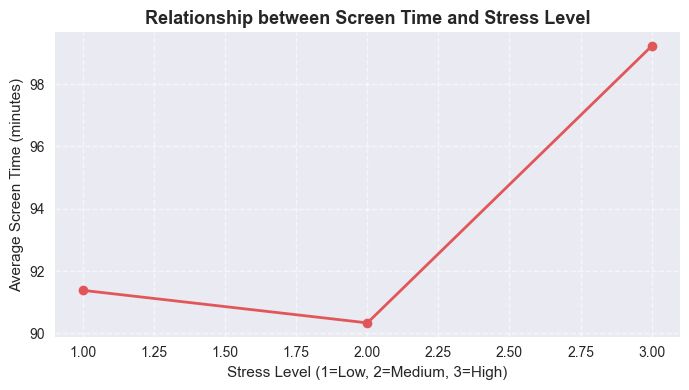

In [47]:
#  1: Line Plot
#Simple line plot showing the relationship between screen time and stress level.

# Convert stress level categories to numeric values (Low=1, Medium=2, High=3)
level_map = {"Low": 1, "Medium": 2, "High": 3}
df["stress_level_num"] = df["stress_level"].map(level_map)

# Group by stress level and calculate the average screen time
avg_stress = df.groupby("stress_level_num")["screen_time_min"].mean().reset_index()

# Create the line plot
plt.figure(figsize=(7,4))
plt.plot(avg_stress["stress_level_num"], avg_stress["screen_time_min"], 
         marker='o', color="#E15759", linewidth=2)

# Add title and labels
plt.title("Relationship between Screen Time and Stress Level", fontsize=13, fontweight='bold')
plt.xlabel("Stress Level (1=Low, 2=Medium, 3=High)")
plt.ylabel("Average Screen Time (minutes)")

# Add a light grid for better readability
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()

# Display the plot
plt.show()

In [48]:
print("""
                    Line Plot:
The chart shows that people with higher stress levels tend to spend more time on their screens.
This suggests that digital use may increase as a coping mechanism for stress.
""")


                    Line Plot:
The chart shows that people with higher stress levels tend to spend more time on their screens.
This suggests that digital use may increase as a coping mechanism for stress.



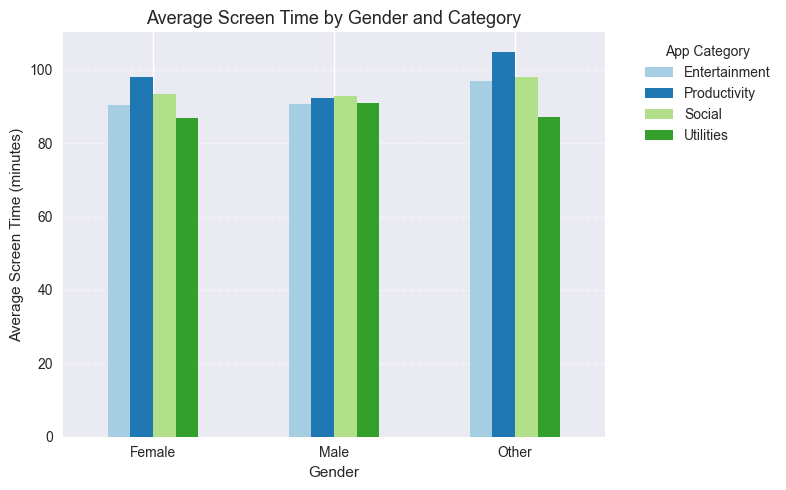

In [73]:
#  2: Bar Chart

# Average screen time by gender and category
avg_screen = df.groupby(["gender", "category"])["screen_time_min"].mean().unstack()

# Bar chart
avg_screen.plot(kind='bar', figsize=(8,5), color=plt.cm.Paired.colors)

plt.title("Average Screen Time by Gender and Category", fontsize=13)
plt.xlabel("Gender")
plt.ylabel("Average Screen Time (minutes)")
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.legend(title="App Category", bbox_to_anchor=(1.05, 1))
plt.tight_layout()
plt.show()

In [50]:
print("""
                    Bar Chart:

Females spend slightly more time on entertainment and social apps,
while males use productivity and utility apps a bit more.
Overall, screen time is quite similar between genders.
""")


                    Bar Chart:

Females spend slightly more time on entertainment and social apps,
while males use productivity and utility apps a bit more.
Overall, screen time is quite similar between genders.



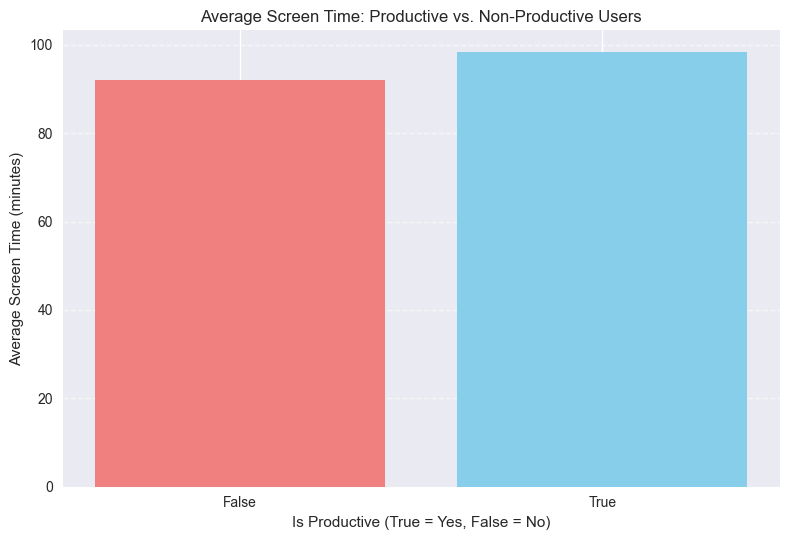

In [51]:
# Calculate average screen time for productive vs non-productive users
avg_productive = df.groupby("is_productive")["screen_time_min"].mean()

# Create bar chart
plt.bar(avg_productive.index.astype(str), avg_productive.values, color=["lightcoral", "skyblue"])

plt.title("Average Screen Time: Productive vs. Non-Productive Users")
plt.xlabel("Is Productive (True = Yes, False = No)")
plt.ylabel("Average Screen Time (minutes)")
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


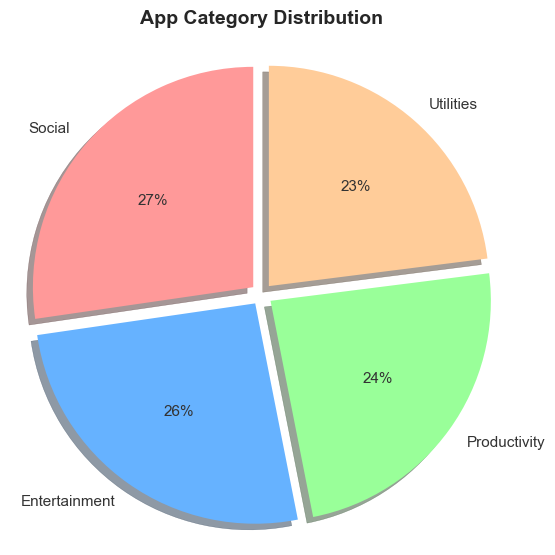

In [52]:
# 4. Pie chart – category distribution
colors = ["#FF9999", "#66B2FF", "#99FF99", "#FFCC99", "#C2C2F0", "#FFD580"]
# count how many apps in each category
category_counts = df["category"].value_counts()

plt.figure(figsize=(6.5, 6.5))

plt.pie(
    category_counts,
    labels=category_counts.index,               # category names
    autopct="%1.0f%%",                          # show percent
    startangle=90,                              # start from top for symmetry
    colors=colors[:len(category_counts)],       # use only needed colors
    shadow=True,                                # light shadow
    explode=[0.05] * len(category_counts),      # small gap for all slices
    textprops={"fontsize": 11, "color": "#333"} # readable labels
)

plt.title("App Category Distribution", fontsize=14, fontweight="bold", pad=15)
plt.axis("equal")
plt.show()

In [53]:
print("""
                    Pie chart:
· Balance: The distribution is largely balanced, with all percentages ranging from 23% to 27%. 
This suggests that the application market (in this data) is diverse and does not depend on a single type.

· Equal attention: There seems to be a close demand from users for social media applications, entertainment, productivity and assistance.
""")


                    Pie chart:
· Balance: The distribution is largely balanced, with all percentages ranging from 23% to 27%. 
This suggests that the application market (in this data) is diverse and does not depend on a single type.

· Equal attention: There seems to be a close demand from users for social media applications, entertainment, productivity and assistance.



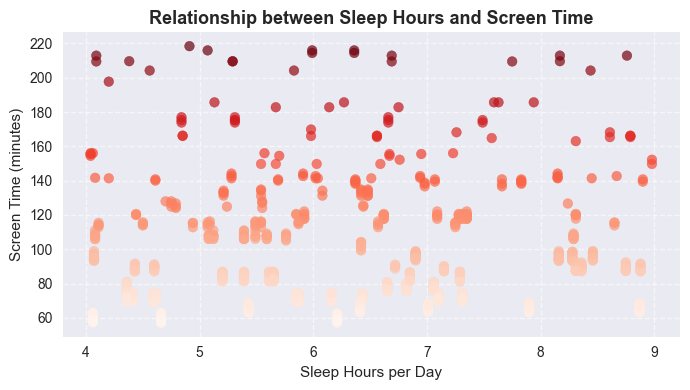

In [54]:
# 5: Scatter Plot: relationship between sleep hours and screen time
plt.figure(figsize=(7,4))
plt.scatter(df["sleep_hours"], df["screen_time_min"],
            c=df["screen_time_min"], cmap="Reds", alpha=0.7)

plt.title("Relationship between Sleep Hours and Screen Time", fontsize=13, fontweight='bold')
plt.xlabel("Sleep Hours per Day")
plt.ylabel("Screen Time (minutes)")
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

In [55]:
print("""
                    Scatter Plot:
Each point is one person.
Fewer sleep hours (4–5) = darker, higher points → more screen time.
More sleep (8–9 hours) = lighter, lower points → less screen time.
""")


                    Scatter Plot:
Each point is one person.
Fewer sleep hours (4–5) = darker, higher points → more screen time.
More sleep (8–9 hours) = lighter, lower points → less screen time.



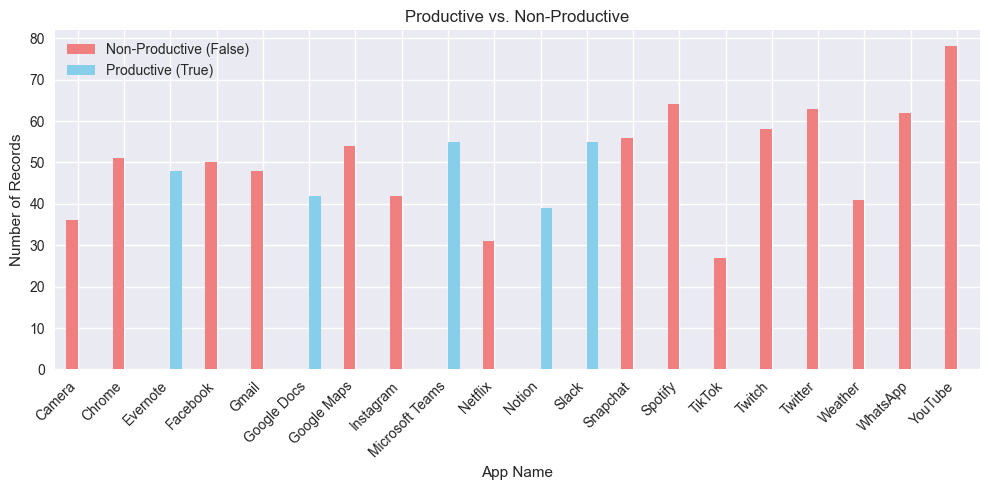

In [56]:
# Count how many times each app is productive or not
app_productivity = df.groupby(["app_name", "is_productive"]).size().unstack(fill_value=0)

# Create bar chart
app_productivity.plot(kind="bar", figsize=(10,5), color=["lightcoral", "skyblue"])

plt.title("Productive vs. Non-Productive")
plt.xlabel("App Name")
plt.ylabel("Number of Records")
plt.xticks(rotation=45, ha='right')
plt.legend(["Non-Productive (False)", "Productive (True)"])
plt.tight_layout()
plt.show()


C:\Users\USER PC\AppData\Local\Temp\ipykernel_10504\1804312575.py:2: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([df[df["gender"]=="Male"]["screen_time_min"],


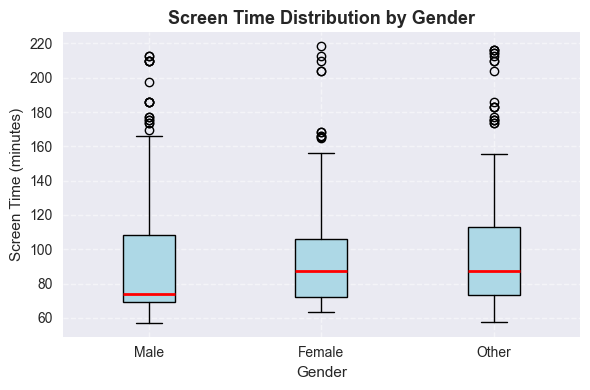

In [76]:
plt.figure(figsize=(6,4))
plt.boxplot([df[df["gender"]=="Male"]["screen_time_min"],
              df[df["gender"]=="Female"]["screen_time_min"],
              df[df["gender"]=="Other"]["screen_time_min"]],
             labels=["Male", "Female", "Other"],
             patch_artist=True,
             boxprops=dict(facecolor="lightblue", color="black"),
             medianprops=dict(color="red", linewidth=2))

plt.title("Screen Time Distribution by Gender", fontsize=13, fontweight='bold')
plt.xlabel("Gender")
plt.ylabel("Screen Time (minutes)")
plt.grid(True, linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()


print("""
                    Box plot:
The chart shows that males and females have similar screen time (around 80–90 minutes).
The “Other” group shows a wider range, meaning some spend much longer on screens.
Overall, there’s no big gender difference, but all groups include heavy users.
""")

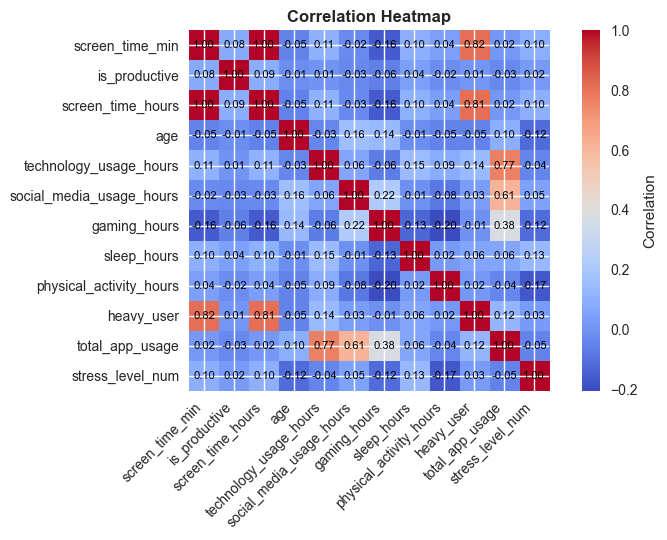

In [59]:
#  7 Correlation Heatmap
# Calculate the correlation matrix (only numeric columns)
corr = df.corr(numeric_only=True)

plt.imshow(corr, cmap='coolwarm')
plt.colorbar(label='Correlation')

# Show values inside boxes
for i in range(len(corr)):
    for j in range(len(corr)):
        plt.text(j, i, f"{corr.iloc[i, j]:.2f}", ha='center', va='center', color='black', fontsize=8)

plt.xticks(range(len(corr.columns)), corr.columns, rotation=45, ha='right')
plt.yticks(range(len(corr.columns)), corr.columns)
plt.title("Correlation Heatmap", fontsize=12, fontweight='bold')
plt.tight_layout()
plt.show()

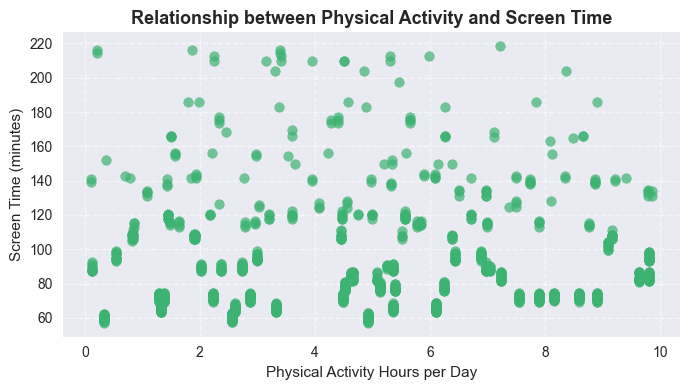

In [60]:
plt.figure(figsize=(7,4))
plt.scatter(df["physical_activity_hours"], df["screen_time_min"], color="mediumseagreen", alpha=0.7)

plt.title("Relationship between Physical Activity and Screen Time", fontsize=13, fontweight='bold')
plt.xlabel("Physical Activity Hours per Day")
plt.ylabel("Screen Time (minutes)")
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


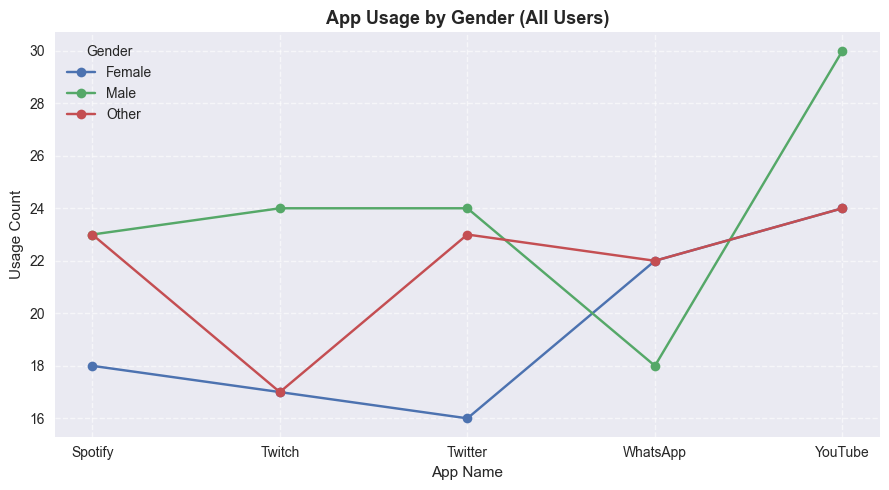

In [61]:
gender_app = df.groupby(["gender", "app_name"]).size().reset_index(name="usage_count")
# نختار أكثر 5 تطبيقات استخدامًا فقط لسهولة العرض
top_apps = gender_app.groupby("app_name")["usage_count"].sum().nlargest(5).index
gender_app = gender_app[gender_app["app_name"].isin(top_apps)]

plt.figure(figsize=(9,5))
for g in gender_app["gender"].unique():
    subset = gender_app[gender_app["gender"] == g]
    plt.plot(subset["app_name"], subset["usage_count"], marker='o', label=g)

plt.title("App Usage by Gender (All Users)", fontsize=13, fontweight='bold')
plt.xlabel("App Name")
plt.ylabel("Usage Count")
plt.legend(title="Gender")
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

In [62]:
print("""
· Different usage styles: each gender has special preferences in app types

· Communication apps are essential: YouTube and WhatsApp retain cross-gender popularity

· Interests Specialisation: Twitch (Gaming) Is More Attractive To Males, While Spotify (Music) Is More Attractive To Females
""")


· Different usage styles: each gender has special preferences in app types

· Communication apps are essential: YouTube and WhatsApp retain cross-gender popularity

· Interests Specialisation: Twitch (Gaming) Is More Attractive To Males, While Spotify (Music) Is More Attractive To Females



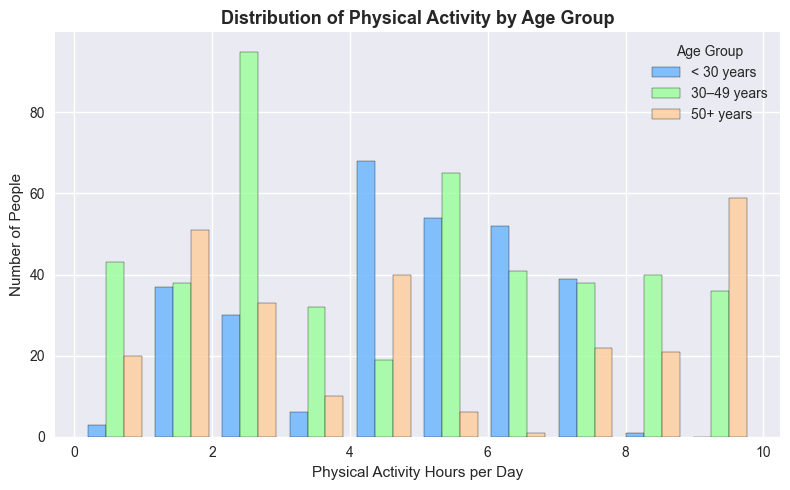

In [63]:
plt.figure(figsize=(8,5))
plt.hist([df[df["age"] < 30]["physical_activity_hours"],
          df[(df["age"] >= 30) & (df["age"] < 50)]["physical_activity_hours"],
          df[df["age"] >= 50]["physical_activity_hours"]],
         bins=10, label=["< 30 years", "30–49 years", "50+ years"],
         color=["#66b3ff", "#99ff99", "#ffcc99"], alpha=0.8, edgecolor="black")

plt.title("Distribution of Physical Activity by Age Group", fontsize=13, fontweight='bold')
plt.xlabel("Physical Activity Hours per Day")
plt.ylabel("Number of People")
plt.legend(title="Age Group")
plt.tight_layout()
plt.show()


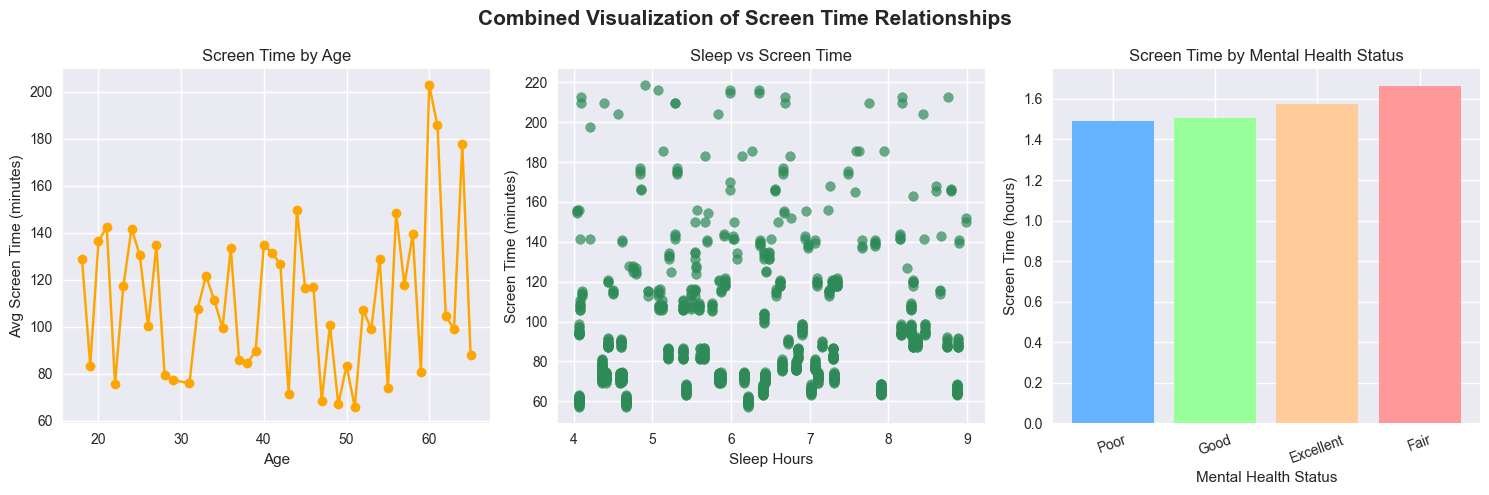

In [64]:
fig, axs = plt.subplots(1, 3, figsize=(15,5))

# Line Plot — Age vs Screen Time
avg_age = df.groupby("age")["screen_time_min"].mean()
axs[0].plot(avg_age.index, avg_age.values, color="orange", marker="o")
axs[0].set_title("Screen Time by Age")
axs[0].set_xlabel("Age")
axs[0].set_ylabel("Avg Screen Time (minutes)")

# Scatter Plot — Sleep vs Screen Time
axs[1].scatter(df["sleep_hours"], df["screen_time_min"], color="seagreen", alpha=0.7)
axs[1].set_title("Sleep vs Screen Time")
axs[1].set_xlabel("Sleep Hours")
axs[1].set_ylabel("Screen Time (minutes)")

# Bar Chart — Mental Health vs Screen Time
avg_mental = df.groupby("mental_health_status")["screen_time_hours"].mean().sort_values()
axs[2].bar(avg_mental.index, avg_mental.values, color=["#66b3ff", "#99ff99", "#ffcc99", "#ff9999"])
axs[2].set_title("Screen Time by Mental Health Status")
axs[2].set_xlabel("Mental Health Status")
axs[2].set_ylabel("Screen Time (hours)")
axs[2].tick_params(axis='x', rotation=20)

plt.suptitle("Combined Visualization of Screen Time Relationships", fontsize=15, fontweight='bold')
plt.tight_layout()
plt.show()

In [65]:
print("""
The data shows that older adults (50–60) tend to spend more time on screens than younger users.
There is still a clear negative relationship between sleep hours and screen time.
Interestingly, people with good or excellent mental health show slightly higher screen time,
which might indicate productive or balanced digital use rather than stress-related behavior.
""")


The data shows that older adults (50–60) tend to spend more time on screens than younger users.
There is still a clear negative relationship between sleep hours and screen time.
Interestingly, people with good or excellent mental health show slightly higher screen time,
which might indicate productive or balanced digital use rather than stress-related behavior.



In [66]:
# Create a new column for the Digital Wellbeing Index
# Formula: (sleep_hours - social_media_usage_hours) / (stress_level_num + 1)

df["digital_wellbeing_index"] = (
    (df["sleep_hours"] - df["social_media_usage_hours"]) /
    (df["stress_level_num"] + 1)
)

# Save the updated DataFrame to the same CSV file
df.to_csv("new_merged_dataset.csv", index=False)

print("digital_wellbeing_index column created and file saved successfully!")

digital_wellbeing_index column created and file saved successfully!


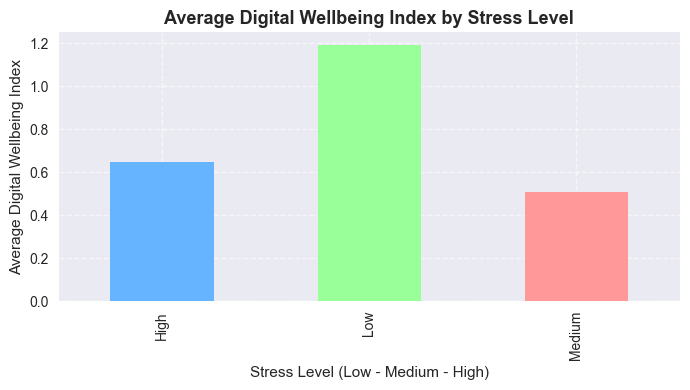

In [67]:
# Group by stress level and find the average wellbeing index
avg_index = df.groupby("stress_level")["digital_wellbeing_index"].mean()

# Create a bar chart
plt.figure(figsize=(7,4))
avg_index.plot(kind="bar", color=["#66b3ff", "#99ff99", "#ff9999"])
plt.title("Average Digital Wellbeing Index by Stress Level", fontsize=13, fontweight='bold')
plt.xlabel("Stress Level (Low - Medium - High)")
plt.ylabel("Average Digital Wellbeing Index")
plt.grid(True, linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()